In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.cm as cm #color maps
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
features = pd.read_csv('nick_df_features.csv',index_col=0)

features.sample(5)

,Date,Weekday,BlockDensity,OtherPuzAns,AnswerLength,WeekdayNum
4237,2005-10-06,Thursday,16.444444,5735,4.947368,3
1997,1999-07-18,Sunday,18.140590,7834,5.450704,6
1354,1997-10-10,Friday,14.222222,3832,5.514286,4
803,1996-04-07,Sunday,18.367347,9071,5.217391,6
6466,2011-12-24,Saturday,11.555556,3584,5.685714,5


In [3]:
class_labels = features.groupby(['WeekdayNum','Weekday']).size().reset_index()['Weekday'].tolist()

In [4]:
X = features[['BlockDensity','OtherPuzAns','AnswerLength']].to_numpy()
y = features[['WeekdayNum']].to_numpy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 617, 
                                                    shuffle=True,
                                                    stratify=y)

In [6]:
dtree = DecisionTreeClassifier(max_depth=8, random_state=440)
rf = RandomForestClassifier(max_depth=8, random_state=617)
svc = LinearSVC(C=3.74,loss="hinge",max_iter=200000)

In [7]:
vote = VotingClassifier([('dtree',DecisionTreeClassifier(max_depth=8, random_state=440)),
                         ('rf',RandomForestClassifier(max_depth=8, random_state=617)),
                         ('svc',LinearSVC(C=3.74,loss="hinge",max_iter=200000))])

In [8]:
#vote.fit(X_train, y_train.ravel())

In [9]:
# pred = vote.predict(X_test)
# print("Accuracy:",np.round(accuracy_score(y_test,pred)*100,2))

In [10]:
# print each classifier's accuracy
for name,clf in (["decision tree",dtree],
                 ["random forest",rf],
                 ["support vector",svc],
                 ["voting", vote]):
    # fit the model
    clf.fit(X_train,y_train.ravel())
    
    # predict
    y_pred = clf.predict(X_test)
    
    # get acc
    acc = np.round(accuracy_score(y_test,y_pred)*100,2)
    
    print(f"Model: {name}\t Accuracy: {acc}")

Model: decision tree	 Accuracy: 48.11
Model: random forest	 Accuracy: 48.98


c:\users\ndanis\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model: support vector	 Accuracy: 26.48
Model: voting	 Accuracy: 48.11


c:\users\ndanis\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


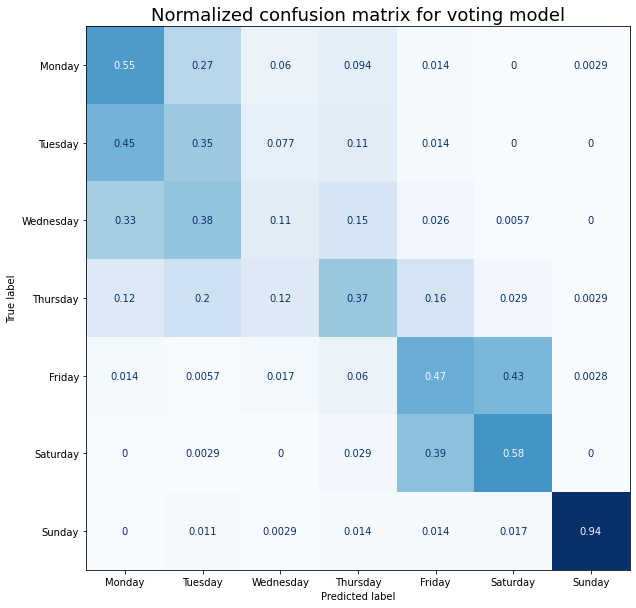

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(vote, X_test, y_test, 
                      display_labels=class_labels,
                      ax=ax, 
                      normalize='true',
                      cmap=cm.get_cmap('Blues'),
                      colorbar=False)
ax.set_title(f"Normalized confusion matrix for voting model", fontsize=18)
plt.show()